In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
fraudsters = pd.read_csv('fraudsters.csv')
fraudsters

,USER_ID
0,2c831c76-2d62-41ce-a240-e12f505d389a
1,ce2a1146-831e-49a7-aa5f-a3045a2892af
2,447abe11-f89a-4819-bea2-e7978b1cf560
3,3a186446-c2fb-474b-a8d8-db362643b3d2
4,73fa6100-f6f0-4e22-b247-714f4743c125
...,...
752,a1ae4510-e64c-4e82-96f9-45642f23faca
753,83f77f7d-edda-498f-a8cc-15c7f81ee6ba
754,16edbc39-9a9f-437e-b025-b2acb231e197
755,20413b20-0b73-4d52-8bf9-476d6fdb44c5


In [3]:
users = pd.read_csv('users.csv')
users

,ID,CREATED_DATE,COUNTRY,BIRTH_DATE
0,46f44852-aaa5-4634-aadd-8cc4eefef3c8,2019-04-22 18:30:30.735,BG,1984-10-22
1,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-15 02:44:24.94,IE,1984-11-04
2,55e6fcef-f573-4c54-8b27-537adc417e19,2019-04-03 16:10:44.53,PL,1977-09-08
3,dc03019c-9cf1-4081-a70a-6922a44fe393,2019-04-13 14:16:11.928,FR,1992-09-06
4,bcd967e5-c273-45a7-a7f5-e7c9e3b19b7e,2019-04-03 15:46:43.997,IE,1993-10-22
...,...,...,...,...
200245,dd5ddfa9-324c-4a96-9907-96c1a803e2c4,2019-03-19 14:39:14.092,IT,1997-11-28
200246,3e0aabef-d3ba-4b56-8ee2-fba450273489,2019-04-14 19:37:25.514,FR,1998-04-21
200247,909b5bc8-a751-4456-b6b9-9249a1a6488f,2019-04-18 12:59:06.56,RO,2000-09-19
200248,c3cc84e8-9b03-4062-a8e0-fcf0af1f17ad,2019-04-15 19:19:17.886,FR,1990-07-05


In [4]:
transactions = pd.read_csv('transactions.csv')
transactions

,ID,USER_ID,CREATED_DATE,TYPE,STATE,AMOUNT_GBP,CURRENCY
0,f659b44e-cfdf-48de-bcf3-06f47ef26e9f,fd7f3ff6-0ed6-4a85-a7b5-2f205e0ef72f,2019-04-20 18:04:03.93,CARD_PAYMENT,COMPLETED,13.12,PLN
1,2ae18b8b-b9bc-4c44-96b1-d43efd8d371d,3979518e-95f7-4b6c-81ae-2f828727d81a,2019-05-03 13:09:57.625,TOPUP,REVERTED,0.01,RON
2,0162d352-dd18-40ab-b3ee-cf6584c9a238,75aa5388-9c89-4f72-bc54-67501519585b,2019-04-25 15:37:46.837,TOPUP,COMPLETED,10.00,GBP
3,a4e176f7-49ca-462b-9164-2f0645622148,45598164-6362-4ee4-bd70-ffee3bd1d707,2019-04-28 13:52:15.256,EXCHANGE,COMPLETED,0.11,RON
4,f6f9135f-fb2b-4a58-bb65-dd9713306a71,5a501ce5-f03c-410d-aabc-434b2cad741d,2019-05-13 16:02:12.081,CARD_PAYMENT,COMPLETED,9.79,EUR
...,...,...,...,...,...,...,...
1068356,3434ed2e-517b-4452-a199-bf79bd58bbee,b17a0706-0bb1-4b93-9ebc-af10b2d70247,2019-04-27 10:10:04.151,TOPUP,REVERTED,0.01,GBP
1068357,383298cb-64d8-4a14-b0c1-3bd2d7695155,de53d6cc-158f-4ca9-98a1-81ee6cfec6f0,2019-04-28 17:56:41.602,FEE,COMPLETED,5.37,EUR
1068358,0717b084-2a5d-4214-9062-1b09f085befe,721dfdad-2e4b-4f2b-b296-a9b692f743dc,2019-04-11 12:47:50.575,FEE,COMPLETED,120.41,EUR
1068359,145d2404-0fa2-47ce-a6e9-6b0eb0b1041c,bb7d9b60-17b8-4463-be01-e3326e67019b,2019-04-11 10:15:58.585,TOPUP,FAILED,10.00,GBP


In [5]:
frauds = pd.merge(fraudsters, transactions, on="USER_ID")
frauds.reset_index(inplace=True, drop=True)
frauds

,USER_ID,ID,CREATED_DATE,TYPE,STATE,AMOUNT_GBP,CURRENCY
0,2c831c76-2d62-41ce-a240-e12f505d389a,071c5593-34f4-4c37-92a2-fce923ee4cf9,2019-04-15 06:03:13.513,FEE,COMPLETED,6.81,EUR
1,2c831c76-2d62-41ce-a240-e12f505d389a,42b58f10-6abb-4e85-aac3-608782fe31e2,2019-04-28 18:56:33.305,ATM,COMPLETED,21.45,EUR
2,2c831c76-2d62-41ce-a240-e12f505d389a,d065d571-4a30-4bc0-88af-135284b6f65c,2019-04-15 05:53:33.53,TOPUP,REVERTED,0.01,EUR
3,2c831c76-2d62-41ce-a240-e12f505d389a,9f23ddd0-bd2c-4fa9-86bb-34b24c6bbd30,2019-04-27 16:29:28.068,CARD_PAYMENT,DECLINED,0.01,EUR
4,2c831c76-2d62-41ce-a240-e12f505d389a,c0a0b196-df90-462f-ab34-1d3af904739a,2019-04-28 07:27:40.075,ATM,COMPLETED,0.44,BGN
...,...,...,...,...,...,...,...
8217,20413b20-0b73-4d52-8bf9-476d6fdb44c5,bd989532-1abf-421a-863f-52693b629b30,2019-04-29 22:21:36.534,TOPUP,COMPLETED,20.00,GBP
8218,20413b20-0b73-4d52-8bf9-476d6fdb44c5,0a3c51b4-01fc-46e7-8a35-f7a3f795ef10,2019-04-29 22:22:33.665,TOPUP,COMPLETED,10.00,GBP
8219,20413b20-0b73-4d52-8bf9-476d6fdb44c5,d58a6111-4e36-4231-ad07-1b60b75f3cc0,2019-04-29 22:22:14.307,TOPUP,COMPLETED,20.00,GBP
8220,895f626a-fb45-44da-9711-4429a2d153c8,518c38d0-1fc9-435f-bc48-673a5f59e825,2019-05-03 19:15:16.831,TOPUP,COMPLETED,200.00,GBP


In [6]:
all_transactions = pd.concat([transactions, frauds])
all_transactions.reset_index(inplace=True, drop=True)
all_transactions

,ID,USER_ID,CREATED_DATE,TYPE,STATE,AMOUNT_GBP,CURRENCY
0,f659b44e-cfdf-48de-bcf3-06f47ef26e9f,fd7f3ff6-0ed6-4a85-a7b5-2f205e0ef72f,2019-04-20 18:04:03.93,CARD_PAYMENT,COMPLETED,13.12,PLN
1,2ae18b8b-b9bc-4c44-96b1-d43efd8d371d,3979518e-95f7-4b6c-81ae-2f828727d81a,2019-05-03 13:09:57.625,TOPUP,REVERTED,0.01,RON
2,0162d352-dd18-40ab-b3ee-cf6584c9a238,75aa5388-9c89-4f72-bc54-67501519585b,2019-04-25 15:37:46.837,TOPUP,COMPLETED,10.00,GBP
3,a4e176f7-49ca-462b-9164-2f0645622148,45598164-6362-4ee4-bd70-ffee3bd1d707,2019-04-28 13:52:15.256,EXCHANGE,COMPLETED,0.11,RON
4,f6f9135f-fb2b-4a58-bb65-dd9713306a71,5a501ce5-f03c-410d-aabc-434b2cad741d,2019-05-13 16:02:12.081,CARD_PAYMENT,COMPLETED,9.79,EUR
...,...,...,...,...,...,...,...
1076578,bd989532-1abf-421a-863f-52693b629b30,20413b20-0b73-4d52-8bf9-476d6fdb44c5,2019-04-29 22:21:36.534,TOPUP,COMPLETED,20.00,GBP
1076579,0a3c51b4-01fc-46e7-8a35-f7a3f795ef10,20413b20-0b73-4d52-8bf9-476d6fdb44c5,2019-04-29 22:22:33.665,TOPUP,COMPLETED,10.00,GBP
1076580,d58a6111-4e36-4231-ad07-1b60b75f3cc0,20413b20-0b73-4d52-8bf9-476d6fdb44c5,2019-04-29 22:22:14.307,TOPUP,COMPLETED,20.00,GBP
1076581,518c38d0-1fc9-435f-bc48-673a5f59e825,895f626a-fb45-44da-9711-4429a2d153c8,2019-05-03 19:15:16.831,TOPUP,COMPLETED,200.00,GBP


## Feature Engineering

In [7]:
now = pd.Timestamp('now')
users['dob'] = pd.to_datetime(users['BIRTH_DATE'], infer_datetime_format=True)
users['dob'] = users['dob'].where(users['dob'] < now, users['dob'] -  np.timedelta64(100, 'Y'))    
users['AGE'] =  (now - users['dob']).astype('<m8[Y]')
users['USER_ID'] = users['ID']
users = users.drop('dob', axis=1).drop('BIRTH_DATE',axis=1).drop('CREATED_DATE',axis=1).drop('ID',axis=1)

In [8]:
all_transactions.rename(columns = {'ID_x': 'ID', 'CREATED_DATE_x': 'CREATED_DATE', 'CREATED_DATE_y': 'USER_CREATED_DATE'}, inplace = True)
all_transactions.reset_index(drop=True)
all_transactions

,ID,USER_ID,CREATED_DATE,TYPE,STATE,AMOUNT_GBP,CURRENCY
0,f659b44e-cfdf-48de-bcf3-06f47ef26e9f,fd7f3ff6-0ed6-4a85-a7b5-2f205e0ef72f,2019-04-20 18:04:03.93,CARD_PAYMENT,COMPLETED,13.12,PLN
1,2ae18b8b-b9bc-4c44-96b1-d43efd8d371d,3979518e-95f7-4b6c-81ae-2f828727d81a,2019-05-03 13:09:57.625,TOPUP,REVERTED,0.01,RON
2,0162d352-dd18-40ab-b3ee-cf6584c9a238,75aa5388-9c89-4f72-bc54-67501519585b,2019-04-25 15:37:46.837,TOPUP,COMPLETED,10.00,GBP
3,a4e176f7-49ca-462b-9164-2f0645622148,45598164-6362-4ee4-bd70-ffee3bd1d707,2019-04-28 13:52:15.256,EXCHANGE,COMPLETED,0.11,RON
4,f6f9135f-fb2b-4a58-bb65-dd9713306a71,5a501ce5-f03c-410d-aabc-434b2cad741d,2019-05-13 16:02:12.081,CARD_PAYMENT,COMPLETED,9.79,EUR
...,...,...,...,...,...,...,...
1076578,bd989532-1abf-421a-863f-52693b629b30,20413b20-0b73-4d52-8bf9-476d6fdb44c5,2019-04-29 22:21:36.534,TOPUP,COMPLETED,20.00,GBP
1076579,0a3c51b4-01fc-46e7-8a35-f7a3f795ef10,20413b20-0b73-4d52-8bf9-476d6fdb44c5,2019-04-29 22:22:33.665,TOPUP,COMPLETED,10.00,GBP
1076580,d58a6111-4e36-4231-ad07-1b60b75f3cc0,20413b20-0b73-4d52-8bf9-476d6fdb44c5,2019-04-29 22:22:14.307,TOPUP,COMPLETED,20.00,GBP
1076581,518c38d0-1fc9-435f-bc48-673a5f59e825,895f626a-fb45-44da-9711-4429a2d153c8,2019-05-03 19:15:16.831,TOPUP,COMPLETED,200.00,GBP


In [9]:
key_diff = set(transactions['USER_ID']).difference(fraudsters['USER_ID'])

where_diff = transactions['USER_ID'].isin(key_diff)

print(transactions.size)
print(transactions[where_diff].size)
print(len(transactions[transactions['USER_ID'].isin(fraudsters['USER_ID'])]))

7478527
7420973
8222


In [10]:
all_transactions['datetime'] = pd.to_datetime(all_transactions['CREATED_DATE'], infer_datetime_format=True).astype(int) / 10**9
all_transactions =  pd.merge(all_transactions, users, on='USER_ID')
all_transactions['COUNTRY'] = all_transactions['COUNTRY'].astype('category')

# Class Imbalance Handling

We can notice that the original dataset is highly imbalanced! Most of the transactions are non-fraud. To overcome over-fitting of the various predictive models created, we will utilize under-sampling technqiue. More specifically we will create a subsample dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

In [11]:
country_codes = dict(enumerate(all_transactions['COUNTRY'].cat.categories))

all_transactions['STATE'] = all_transactions['STATE'].astype('category')

all_transactions=all_transactions.drop('CURRENCY',axis=1).drop('TYPE',axis=1)
cat_columns = all_transactions.select_dtypes(['category']).columns
all_transactions[cat_columns] = all_transactions[cat_columns].apply(lambda x: x.cat.codes)
all_transactions.loc[all_transactions['USER_ID'].isin(fraudsters['USER_ID']),'Class']=1
all_transactions.loc[all_transactions['USER_ID'].isin(key_diff),'Class']=0

print('No Frauds', round(all_transactions['Class'].value_counts()[0]/len(all_transactions) * 100,2), '% of the dataset')
print('Frauds', round(all_transactions['Class'].value_counts()[1]/len(all_transactions) * 100,2), '% of the dataset')

No Frauds 98.47 % of the dataset
Frauds 1.53 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

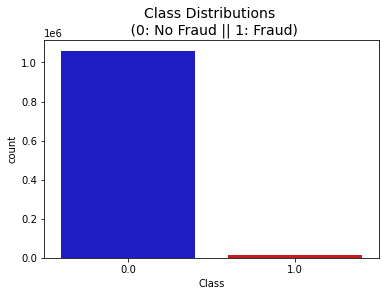

In [12]:

colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=all_transactions, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

## Distributions:

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. The distributions of **Transaction Amounts** and **Transaction Times** have been shown below.

(1554250177.571, 1558140658.493)

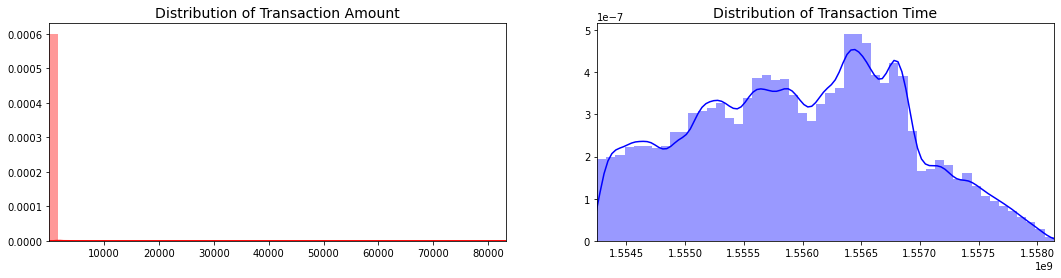

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = all_transactions['AMOUNT_GBP'].values
time_val = all_transactions['datetime'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

# Summary:
1. There are 8222 cases of fraud in our dataset so we can randomly get 8222 cases of non-fraud to create our new sub dataframe. We concat the 8222 cases of fraud and non fraud, creating a new sub-sample.
2. Rather than taking all the fraudsters' transactions for the training, we select 20% of the fraudsters for test-set in production and 80% of the fraudsters for trainining/validation set. With those percentages we concat 40% more non-fradulent users' transactions for each of the previous fraudster fractions to compile the training/validation set and production test set.

In [14]:
# Randomly shuffle list of fraudsters

shuffle_indices = np.arange(fraudsters['USER_ID'].shape[0])
np.random.shuffle(shuffle_indices)
fraudsters_shuffled = fraudsters['USER_ID'].values[shuffle_indices]

# Select 20% of the fraudsters for test-set in production and 80% of the fraudsters for trainining/validation set
dev_sample_index = -1 * int(0.20 * float(len(fraudsters_shuffled)))  # test set 40 percent

fraudsters_train_valid_test, fraudsters_test_prod = fraudsters_shuffled[:dev_sample_index], fraudsters_shuffled[dev_sample_index:]
print('Number of fraudsters in training set: ',len(fraudsters_train_valid_test))
print('Number of fraudsters in production test set: ',len(fraudsters_test_prod))
print('Ratio of frausters test/train: ',len(fraudsters_test_prod)/len(fraudsters_train_valid_test) )


# Extract 40 % more non-fraudsters than number of fraudsters_test_prod for production test
num_fraudsters = len(fraudsters_test_prod)
num_non_fraudsters_for_test_prod = int(round(num_fraudsters * 1.4,0))
#print(num_non_fraudsters_for_test_prod)
non_fraudsters_ids = set(transactions['USER_ID']).difference(fraudsters['USER_ID'])


#Shuffle non_fraudsters_ids
non_fraudsters_ids = list(non_fraudsters_ids)
np.random.shuffle(non_fraudsters_ids)


#Select num_non_fraudsters_for_test_prod from shuffled list above.
non_fraudsters_ids_shuffled_limited  = non_fraudsters_ids[:num_non_fraudsters_for_test_prod]
non_fraudsters_prod_test = all_transactions['USER_ID'].isin(non_fraudsters_ids_shuffled_limited)
non_fraudsters_features_df_prod_test = all_transactions[non_fraudsters_prod_test]
print('Number of transactions of non_fraudsters in production:',len(non_fraudsters_features_df_prod_test))

#Select rest of non_fraudsters for training and validation and test while model creation.
non_fraudsters_ids_shuffled_training  = non_fraudsters_ids[num_non_fraudsters_for_test_prod:]
non_fraudsters_train_validate = all_transactions['USER_ID'].isin(non_fraudsters_ids_shuffled_training)
non_fraudsters_features_df_train_validate = all_transactions[non_fraudsters_train_validate]


#Extract all_transactions from fraudsters_test_prod
fraudsters_prod_test = all_transactions['USER_ID'].isin(fraudsters_test_prod) 
fraudsters_features_df_prod_test = all_transactions[fraudsters_prod_test]
print('Number of transactions of fraudsters in production:',len(fraudsters_features_df_prod_test))


#Extract all_transactions from fraudsters_train_valid_test
fraudsters_train_validate = all_transactions['USER_ID'].isin(fraudsters_train_valid_test) 
fraudsters_features_df_train_valid_test = all_transactions[fraudsters_train_validate]



# Mix the two production DFs for test in production
frames = [non_fraudsters_features_df_prod_test,fraudsters_features_df_prod_test]
concatenated_prod  = pd.concat(frames)

# Mix the two train/validate DFs for train,validate and test while model creation
frames = [non_fraudsters_features_df_train_validate,fraudsters_features_df_train_valid_test]
concatenated_train = pd.concat(frames)

# Sort by DATE_CREATED
final_features_df_train_validate_test = concatenated_train.sort_values(by = ['CREATED_DATE'])
final_features_df_prod_test = concatenated_prod.sort_values(by = ['CREATED_DATE'])


print('No Frauds for prod_test', round(final_features_df_prod_test['Class'].value_counts()[0]/len(final_features_df_prod_test) * 100,2), '% of the dataset')
print('Frauds for prod_test', round(final_features_df_prod_test['Class'].value_counts()[1]/len(final_features_df_prod_test) * 100,2), '% of the dataset')


#Extract Transactions for production test
transactions_prod_test = transactions[transactions['USER_ID'].isin(final_features_df_prod_test['USER_ID'])]


final_features_df_train_validate_test=final_features_df_train_validate_test.drop('CREATED_DATE',axis=1).drop('USER_ID', axis = 1).drop('ID', axis = 1)

Number of fraudsters in training set:  606
Number of fraudsters in production test set:  151
Ratio of frausters test/train:  0.24917491749174916
Number of transactions of non_fraudsters in production: 1242
Number of transactions of fraudsters in production: 3408
No Frauds for prod_test 26.71 % of the dataset
Frauds for prod_test 73.29 % of the dataset


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(final_features_df_train_validate_test['Class'].value_counts()[0]/len(final_features_df_train_validate_test) * 100,2), '% of the dataset')
print('Frauds', round(final_features_df_train_validate_test['Class'].value_counts()[1]/len(final_features_df_train_validate_test) * 100,2), '% of the dataset')


X = final_features_df_train_validate_test.drop('Class', axis=1)
y = final_features_df_train_validate_test['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

No Frauds 98.78 % of the dataset
Frauds 1.22 % of the dataset
Train: [ 212707  212731  212732 ... 1071930 1071931 1071932] Test: [     0      1      2 ... 214503 214504 214505]
Train: [      0       1       2 ... 1071930 1071931 1071932] Test: [212707 212731 212732 ... 429043 429044 429045]
Train: [      0       1       2 ... 1071930 1071931 1071932] Test: [396886 396887 396908 ... 643692 643693 643694]
Train: [      0       1       2 ... 1071930 1071931 1071932] Test: [603452 603453 603519 ... 857759 857760 857761]
Train: [     0      1      2 ... 857759 857760 857761] Test: [ 836543  836644  836645 ... 1071930 1071931 1071932]


In [16]:
# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.98783857 0.01216143]
[0.98783969 0.01216031]


In [17]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

final_features_df_train_validate_test = final_features_df_train_validate_test.sample(frac=1)

# amount of fraud classes number rows.
fraud_df = final_features_df_train_validate_test.loc[final_features_df_train_validate_test['Class'] == 1]
num_fraud_cases = final_features_df_train_validate_test['Class'].value_counts()[1]
non_fraud_df = final_features_df_train_validate_test.loc[final_features_df_train_validate_test['Class'] == 0][:num_fraud_cases]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,STATE,AMOUNT_GBP,datetime,COUNTRY,AGE,Class
467054,2,250.00,1.554555e+09,18,54.0,1.0
270235,3,0.01,1.556835e+09,17,23.0,1.0
66065,2,43.15,1.555531e+09,17,28.0,1.0
61316,0,10.42,1.555776e+09,44,47.0,0.0
303734,2,250.00,1.554575e+09,18,31.0,1.0


Distribution of the Classes in the subsample dataset
0.0    0.5
1.0    0.5
Name: Class, dtype: float64


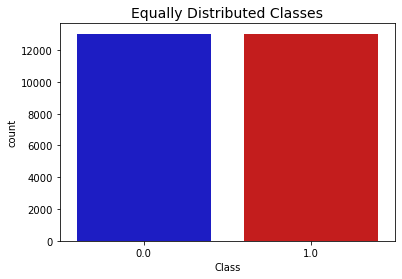

In [18]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

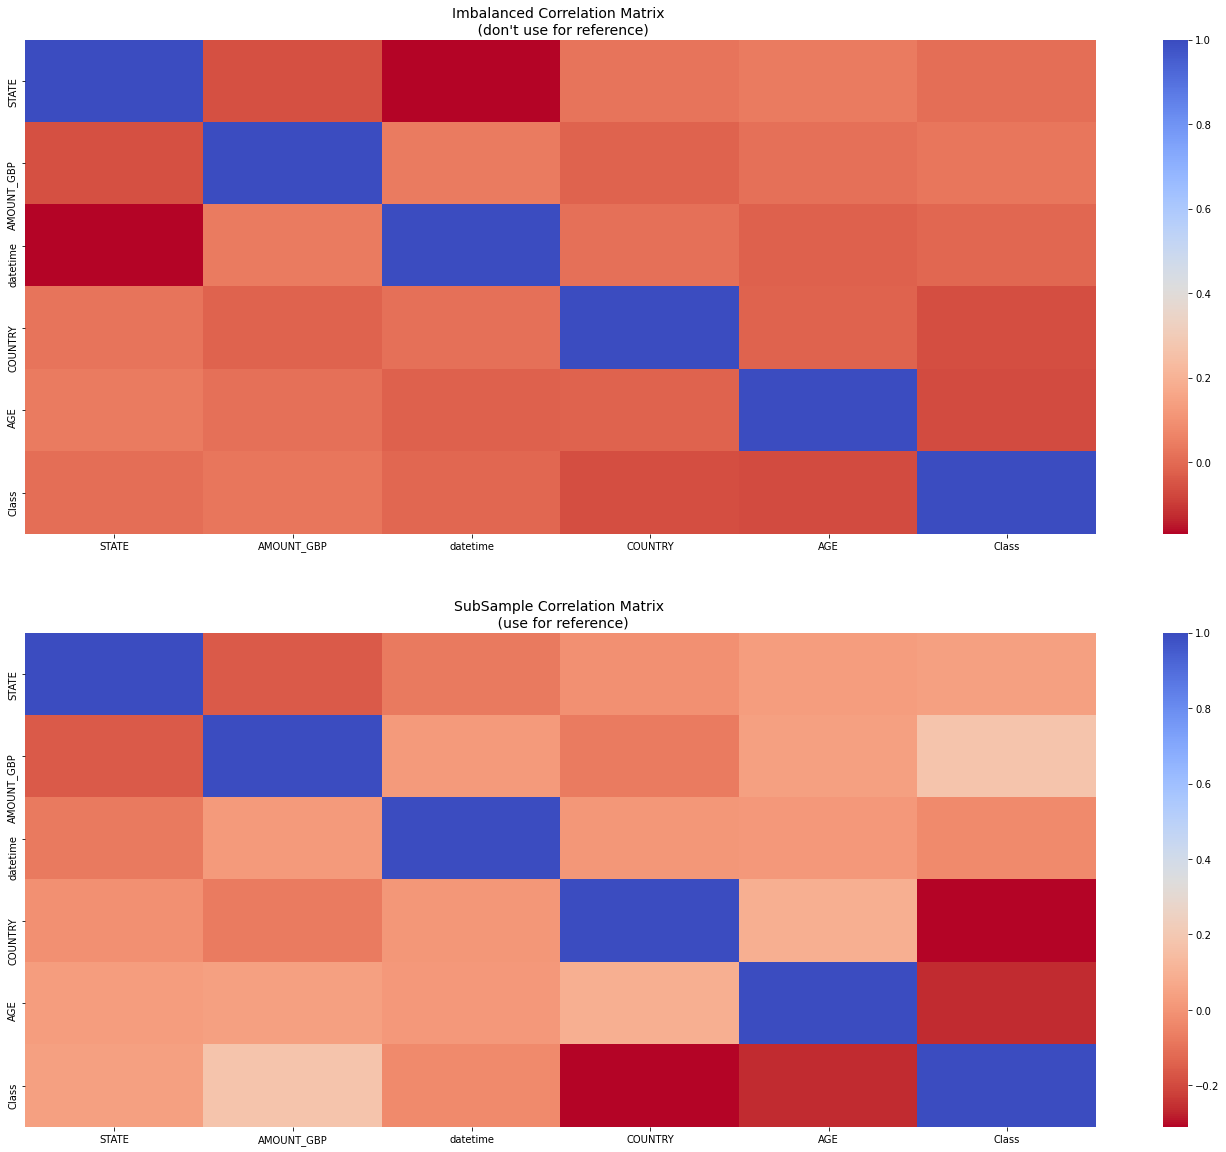

In [19]:
#Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = all_transactions.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


In [20]:

# Undersampling before cross validating
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [21]:
# We should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Machine Learning Classifiers Used
In this attempt, seven Machine Learning Algorithms have been used to separately create seven predictive models and compare their performance:

1. **Logistic Regression**
2. **K-Nearest Neighbours**
3. **Binary Support Vector Classifier**
4. **Decision Tree Classifier**
5. **Random Forest Classifier**
6. **Light GBM Classifier**
7. **Hist Gradient Classifier**

The following re-ranks the classifiers in order of their models training and validation accuracy:

1. **Random Forest Classifier (94% accuracy score)**  
2. **Decision Tree Classifier (92% accuracy score)**
3. **Light GBM Classifier  (90% accuracy score)**
4. **Hist Gradient Classifier (90% accuracy score)**
5. **K-Nearest Neighbours (74% accuracy score)**
6. **Logistic Regression (50% accuracy score)**
7. **Support Vector Classifier (50% accuracy score)**

In [23]:

# Let's implement simple classifiers

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LGBM": LGBMClassifier(),
    "Hist Gradient": HistGradientBoostingClassifier()
}

In [24]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression has a training score of 50.0 % accuracy score
Classifiers:  KNeighborsClassifier has a training score of 75.0 % accuracy score
Classifiers:  SVC has a training score of 50.0 % accuracy score
Classifiers:  DecisionTreeClassifier has a training score of 92.0 % accuracy score
Classifiers:  RandomForestClassifier has a training score of 94.0 % accuracy score
Classifiers:  LGBMClassifier has a training score of 90.0 % accuracy score
Classifiers:  HistGradientBoostingClassifier has a training score of 90.0 % accuracy score


In [25]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(classifiers.get('Logistic Regression'), X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(classifiers.get('KNearest'), X_train, y_train, cv=5)

svc_pred = cross_val_predict(classifiers.get('Support Vector Machine'), X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(classifiers.get('Decision Tree'), X_train, y_train, cv=5)
forest_pred = cross_val_predict(classifiers.get('Random Forest'), X_train, y_train, cv=5)
light_pred = cross_val_predict(classifiers.get('LGBM'), X_train, y_train, cv=5)
hist_pred = cross_val_predict(classifiers.get('Hist Gradient'), X_train, y_train, cv=5)


In [26]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train, forest_pred))
print('Light GBM Classifier: ', roc_auc_score(y_train, light_pred))
print('Hist Gradient Classifier: ', roc_auc_score(y_train, hist_pred))


Logistic Regression:  0.5075601195407093
KNears Neighbors:  0.7470011653021514
Support Vector Classifier:  0.5163133473853712
Decision Tree Classifier:  0.9200808511698675
Random Forest Classifier:  0.9367394444893474
Light GBM Classifier:  0.8980958256657223
Hist Gradient Classifier:  0.8944538909349644


# Confusion Matrix


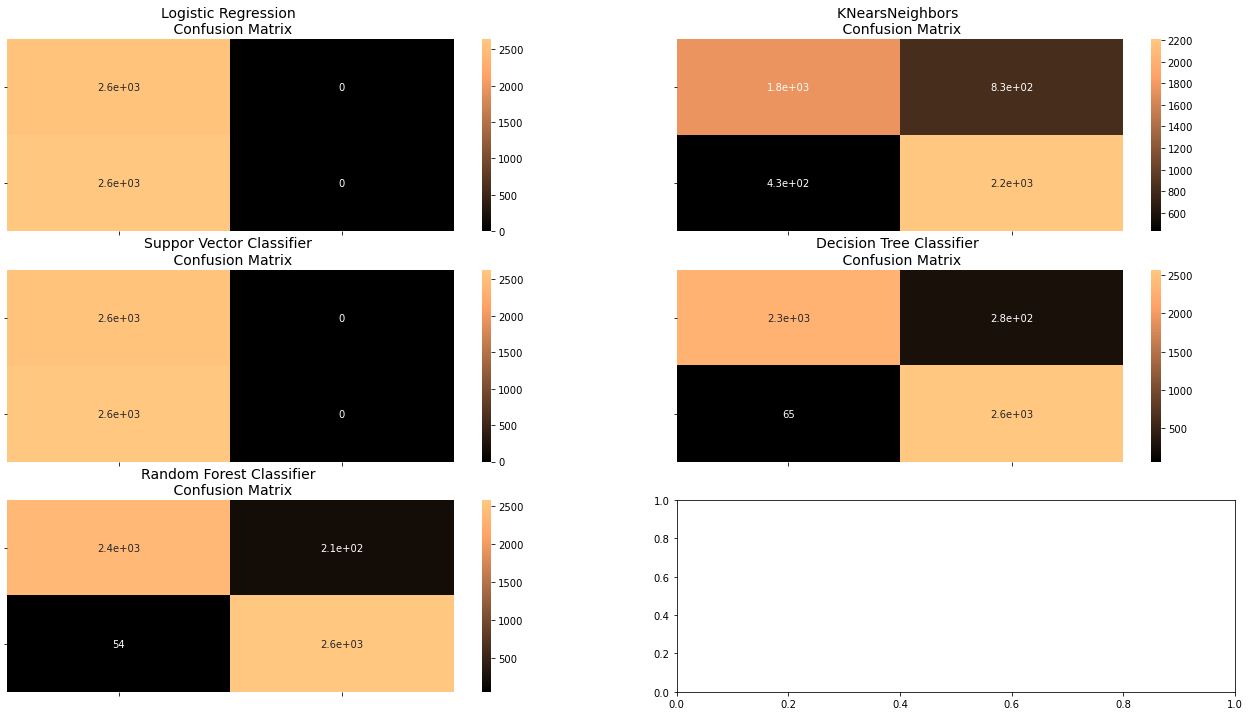

In [27]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted with UnderSampling
log_reg = classifiers.get('Logistic Regression')
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
knears_neighbours = classifiers.get('KNearest')
y_pred_knear = knears_neighbours.predict(X_test)

svc=classifiers.get('Support Vector Machine')
y_pred_svc = svc.predict(X_test)

tree_clf=classifiers.get('Decision Tree')
y_pred_tree = tree_clf.predict(X_test)

tree_clf=classifiers.get('Random Forest')
y_pred_forest = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
forest_cf = confusion_matrix(y_test, y_pred_forest)

fig, ax = plt.subplots(3, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(forest_cf, ax=ax[2][0], annot=True, cmap=plt.cm.copper)
ax[2][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[2][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2][0].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

# Classification Reports


In [28]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_forest))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66      2581
         1.0       0.00      0.00      0.00      2634

    accuracy                           0.49      5215
   macro avg       0.25      0.50      0.33      5215
weighted avg       0.24      0.49      0.33      5215

KNears Neighbors:
              precision    recall  f1-score   support

         0.0       0.80      0.68      0.74      2581
         1.0       0.73      0.84      0.78      2634

    accuracy                           0.76      5215
   macro avg       0.77      0.76      0.76      5215
weighted avg       0.76      0.76      0.76      5215

Support Vector Classifier:
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66      2581
         1.0       0.00      0.00      0.00      2634

    accuracy                           0.49      5215
   macro avg       0.25      0.50      0.33      5215
weighted

## Production Test

In [29]:
# Save the Random Forest Classifier Model
from joblib import dump, load

is_production = True

if not is_production: 
  model_filename = 'FinCrimeRandomForestModel.joblib'
  dump(classifiers["Random Forest"], model_filename)

In [32]:
# Create the production Deployment Class : Patrol
import datetime

class UserBlockProfile:
  def __init__(self,user_id,user_registration_date,user_first_block_date,user_last_block_date,user_country,user_dob):
    self.user_id=user_id
    self.user_registration_date=user_registration_date
    self.user_first_block_date = user_first_block_date
    self.user_last_block_date = user_last_block_date
    self.user_country=user_country
    self.user_dob = user_dob
  
  def update_last_block_date(self,new_block_date):
    self.user_last_block_date = new_block_date


class Patrol:
    def __init__(self):
      self.blocked_users = {}
      self.users_per_transaction_features = all_transactions
      self.dscTreeModel = load('FinCrimeRandomForestModel.joblib')
      self.total_predictions = 0
      self.wrong_predictions = 0
      self.right_predictions = 0

    def check_transaction(self,transaction_id):
      user_features_for_transaction = self.users_per_transaction_features[self.users_per_transaction_features['ID'] == transaction_id]
      if user_features_for_transaction.empty == True:
        print('No transaction found with this ID. Please try again.')
      else:
        #print(user_features_for_transaction)
        X_predict = user_features_for_transaction.drop('Class', axis=1).drop('CREATED_DATE',axis=1).drop('ID',axis=1).drop('USER_ID', axis = 1)
        X_predict = X_predict.to_numpy()
        Y = user_features_for_transaction['Class'].to_numpy()
        user_id = user_features_for_transaction.iloc[0]['USER_ID']
        prediction = self.dscTreeModel.predict(X_predict)
        #print('Shape of prediction: ',len(prediction),"Prediction of Model: ",prediction[0],". Actual Class: ",Y)
        #print(confusion_matrix(Y, prediction))
        #print("Prediction of Model: ",prediction,". Actual Class: ",Y)
        self.total_predictions = self.total_predictions + 1
        if prediction[0] != Y[0]:
          self.wrong_predictions = self.wrong_predictions + 1
        else:
          self.right_predictions = self.right_predictions + 1
        if prediction[0] > 0 :
          if self.blocked_users and user_id in self.blocked_users.keys():
            blocked_user = self.blocked_users.get(user_id)
            d = datetime.datetime.today()
            blocked_user.update_last_block_date(d.strftime("%d-%B-%Y %H:%M:%S"))
            self.blocked_users.update({user_id : blocked_user})
          else:
            registered_user = users[users['USER_ID']==user_id]
            user_created_date = registered_user.iloc[0]['CREATED_DATE']
            user_country =  registered_user.iloc[0]['COUNTRY']
            user_dob = registered_user.iloc[0]['BIRTH_DATE']
            d = datetime.datetime.today()
            user_block_date = d.strftime("%d-%B-%Y %H:%M:%S")
            block_new_user = UserBlockProfile(user_id,user_created_date,user_block_date,user_block_date,user_country,user_dob)
            self.blocked_users[user_id] = block_new_user
          print('USER_LOCKED! due to fradulent transaction detected!')
          
        else:
          print("PASS!")

In [ ]:
# Test Patrol Class for prediction of production test-set transactions
transaction_ids_for_prod_test = transactions_prod_test['ID'].to_list()
user_ids_for_prod_test = transactions_prod_test['USER_ID']
patrolInstance = Patrol()

print('Number of transactions to process: ',len(transaction_ids_for_prod_test))

for transaction_id in transaction_ids_for_prod_test[:30]:
  patrolInstance.check_transaction(transaction_id)
  
print('Fraction of right predictions: ',patrolInstance.right_predictions,'/',patrolInstance.total_predictions)
print('Fraction of wrong predictions:', patrolInstance.wrong_predictions, '/',patrolInstance.total_predictions )
